In [ ]:
# Download dataset ke google colab
!gdown --id 15jBfU0O2wRcmgxZzL31eHom2rObLg7Hn

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15jBfU0O2wRcmgxZzL31eHom2rObLg7Hn
To: /content/data_products_id.csv
100% 167M/167M [00:00<00:00, 255MB/s]


In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv('/content/data_products_id.csv')
df.head()

,product_id,image,name,shop_name,shopid,main_category,sub_category
0,1.252352e+10,e6205d4fcb8a485235778ad210ac4d90,PS3 Super Slim 1TB Full Game + 2 Stik getar + ...,spirit elektronik,379815570.0,Elektronik,Konsol Game
1,1.252352e+10,id-11134207-7qul3-lf6yozwuhi04b2,PS3 Super Slim 1TB Full Game + 2 Stik getar + ...,spirit elektronik,379815570.0,Elektronik,Konsol Game
2,1.794108e+10,8563c9fc31b880ed105f91b8d43e6d88,GAMEBOY PVP DUAL ANALOG FULLSET BISA MAIN DI T...,Gaming Console Store,268909000.0,Elektronik,Konsol Game
3,1.794108e+10,27ad37dbae3d9e3776483634972404f0,GAMEBOY PVP DUAL ANALOG FULLSET BISA MAIN DI T...,Gaming Console Store,268909000.0,Elektronik,Konsol Game
4,1.794108e+10,3a37929008c26d5ebfeea1961e564213,GAMEBOY PVP DUAL ANALOG FULLSET BISA MAIN DI T...,Gaming Console Store,268909000.0,Elektronik,Konsol Game


In [ ]:
df.shape

(888951, 7)

#Preprocessing

In [ ]:
# Menghapus baris duplikat
df = df.drop_duplicates(['name'], keep='first')
df.head()

,product_id,image,name,shop_name,shopid,main_category,sub_category
0,1.252352e+10,e6205d4fcb8a485235778ad210ac4d90,PS3 Super Slim 1TB Full Game + 2 Stik getar + ...,spirit elektronik,379815570.0,Elektronik,Konsol Game
2,1.794108e+10,8563c9fc31b880ed105f91b8d43e6d88,GAMEBOY PVP DUAL ANALOG FULLSET BISA MAIN DI T...,Gaming Console Store,268909000.0,Elektronik,Konsol Game
10,2.351749e+10,id-11134207-7qul7-leyb85rn449s74,Pulsa Min A10 K1T Remote,GAMOLBERKAH,102394348.0,Elektronik,Konsol Game
11,7.978948e+09,d6b77df3df58d6a13b3d78eeb303cbb5,DUS PSP-2004/ DUS PSP STREET E1004,GAMES168,28318233.0,Elektronik,Konsol Game
13,4.653308e+09,f888e78a3845120009602a0b23e65ce0,playstation 2 full game|| hardis external full...,Milkha_shop,293187724.0,Elektronik,Konsol Game


In [ ]:
df.shape

(159442, 7)

In [ ]:
# Preprocessing
import string 
import re

#string punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# remove number from text
def remove_num(text):
  text = re.sub(r"[A-Za-z]+\d+|\d+[A-Za-z]+",'',text).strip()
  text = text.translate(str.maketrans('', '', string.digits))
  return text

def remove_double_spaces(text):
  text = " ".join(text.split())
  return text


In [ ]:
# Apply preproces function to all row in dataset
def preprocess(text):
  text = remove_punctuation(text)
  text = remove_num(text)
  text = remove_double_spaces(text)
  text = text.lower()
  return text

df['clean_name'] = df['name'].apply(lambda x: preprocess(x))

In [ ]:
df = df[['clean_name', 'main_category']]

# Augmentasi data

In [ ]:
import random
import pandas as pd

# Fungsi untuk melakukan flipping pada teks
def flip_text(text):
    words = text.split()
    flipped_text = ' '.join(reversed(words))
    return flipped_text

# Fungsi untuk melakukan word shuffling pada teks
def shuffle_text(text, seed):
    words = text.split()
    random.shuffle(words, random.seed(seed))
    shuffled_text = ' '.join(words)
    return shuffled_text


In [ ]:
# Augmentasi data
augmented_data = []
for index, row in df.iterrows():
    original_text = row['clean_name']
    flipped_text = flip_text(original_text)
    shuffled_text1 = shuffle_text(original_text, 1)
    shuffled_text2 = shuffle_text(original_text, 2)
    shuffled_text3 = shuffle_text(original_text, 3)

    augmented_data.append({'clean_name': original_text, 'main_category': row['main_category']})
    augmented_data.append({'clean_name': flipped_text, 'main_category': row['main_category']})
    augmented_data.append({'clean_name': shuffled_text1, 'main_category': row['main_category']})
    augmented_data.append({'clean_name': shuffled_text2, 'main_category': row['main_category']})
    augmented_data.append({'clean_name': shuffled_text3, 'main_category': row['main_category']})

# Konversi menjadi DataFrame
augmented_df = pd.DataFrame(augmented_data)

# Simpan dataset augmentasi
augmented_df.to_csv('augmented_df.csv', index=False)

In [ ]:
df = augmented_df

In [ ]:
df.head()

,clean_name,main_category
0,super slim full game stik getar full game,Elektronik
1,game full getar stik game full slim super,Elektronik
2,game full slim getar game super stik full,Elektronik
3,getar game stik slim full full game super,Elektronik
4,super getar game full slim full stik game,Elektronik


In [ ]:
df.shape

(797210, 2)

#Model 2

In [ ]:
# Membuat tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

num_words = 50000

tokenizer = Tokenizer(num_words = num_words, oov_token="unk")
tokenizer.fit_on_texts(df['clean_name'].tolist())

In [ ]:
# Membagi data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import OneHotEncoder

X_train, X_valid, y_train, y_valid = train_test_split(df['clean_name'].to_list(),
                                                     df['main_category'].to_list(),
                                                     test_size = 0.1,
                                                     stratify = df['main_category'].to_list(),
                                                     random_state = 0)

x_train = np.array(tokenizer.texts_to_sequences(X_train) )
x_valid = np.array(tokenizer.texts_to_sequences(X_valid) )

x_train = pad_sequences(x_train, padding = 'post', maxlen = 16)
x_valid = pad_sequences(x_valid, padding = 'post', maxlen = 16)

encoder = OneHotEncoder(sparse=False)

# Melakukan one-hot encoding pada variabel target
train_labels = encoder.fit_transform(np.array(y_train).reshape(-1, 1))
valid_labels = encoder.transform(np.array(y_valid).reshape(-1, 1))

<ipython-input-16-0a78ff37f956>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(tokenizer.texts_to_sequences(X_train) )
<ipython-input-16-0a78ff37f956>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array(tokenizer.texts_to_sequences(X_valid) )
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Membuat model
from tensorflow.keras import regularizers

max_features = 50000
embedding_dim = 32
sequence_length =16


model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features + 1, embedding_dim, input_length = sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 16, 32)            1600032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 16, 256)          164864    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
model2.compile(optimizer = 'adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['CategoricalAccuracy'])

In [ ]:
# Train model
epochs = 10

history2 = model2.fit(x_train, train_labels, 
                    epochs = epochs,
                    validation_data = (x_valid, valid_labels),
                    verbose = 1)

Epoch 1/10
22422/22422 [==============================] - 285s 12ms/step - loss: 0.5286 - categorical_accuracy: 0.8480 - val_loss: 0.2828 - val_categorical_accuracy: 0.9159
Epoch 2/10
22422/22422 [==============================] - 250s 11ms/step - loss: 0.2395 - categorical_accuracy: 0.9281 - val_loss: 0.2059 - val_categorical_accuracy: 0.9363
Epoch 3/10
22422/22422 [==============================] - 233s 10ms/step - loss: 0.1776 - categorical_accuracy: 0.9443 - val_loss: 0.1681 - val_categorical_accuracy: 0.9466
Epoch 4/10
22422/22422 [==============================] - 244s 11ms/step - loss: 0.1453 - categorical_accuracy: 0.9534 - val_loss: 0.1466 - val_categorical_accuracy: 0.9527
Epoch 5/10
22422/22422 [==============================] - 234s 10ms/step - loss: 0.1235 - categorical_accuracy: 0.9596 - val_loss: 0.1305 - val_categorical_accuracy: 0.9577
Epoch 6/10
22422/22422 [==============================] - 236s 11ms/step - loss: 0.1085 - categorical_accuracy: 0.9643 - val_loss: 0.12

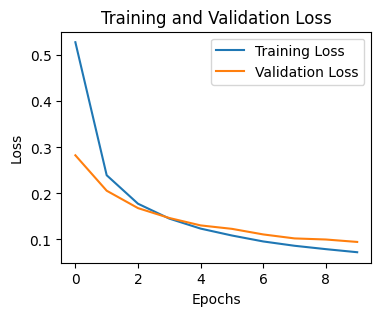

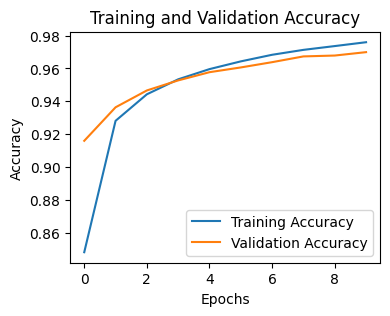

In [ ]:
# Mengambil history loss dan akurasi dari training
train_loss = history2.history['loss']
train_accuracy = history2.history['categorical_accuracy']

# Mengambil history loss dan akurasi dari validasi
val_loss = history2.history['val_loss']
val_accuracy = history2.history['val_categorical_accuracy']

# Plot loss (kerugian) pada training dan validasi
plt.figure(figsize=(4, 3))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot akurasi pada training dan validasi
plt.figure(figsize=(4, 3))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi model pada data validasi
predictions = model2.predict(x_valid)  # Ganti X_valid dengan data validasi Anda

# Mendapatkan label prediksi untuk setiap sampel
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Mendapatkan label sebenarnya untuk setiap sampel
true_labels = tf.argmax(valid_labels, axis=1).numpy()

classification_rep = classification_report(true_labels, predicted_labels) #, target_names=target_names)
print("Classification Report:")
print(classification_rep)

2492/2492 [==============================] - 11s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4401
           1       0.97      0.97      0.97      3200
           2       0.98      0.98      0.98      5679
           3       0.96      0.93      0.94      2917
           4       0.97      0.94      0.95      2692
           5       0.97      0.97      0.97       946
           6       0.97      0.97      0.97      2957
           7       0.98      0.97      0.97      3259
           8       0.98      0.97      0.97      3659
           9       0.98      0.98      0.98      1227
          10       0.97      0.98      0.97      3404
          11       0.97      0.97      0.97      3627
          12       0.99      0.99      0.99      2711
          13       0.99      0.98      0.98      6397
          14       0.98      0.98      0.98      3372
          15       0.98      0.96      0.97      3800


In [ ]:
encoder.categories_[0]

array(['Aksesoris Fashion', 'Buku & Alat Tulis', 'Elektronik',
       'Fashion Bayi & Anak', 'Fashion Muslim', 'Fotografi',
       'Handphone & Aksesoris', 'Hobi & Koleksi', 'Ibu & Bayi',
       'Jam Tangan', 'Kesehatan', 'Komputer & Aksesoris',
       'Makanan & Minuman', 'Olahraga & Outdoor', 'Otomotif',
       'Pakaian Pria', 'Pakaian Wanita', 'Perawatan & Kecantikan',
       'Perlengkapan Rumah', 'Sepatu Pria', 'Sepatu Wanita',
       'Souvenir & Party Supplies', 'Tas Pria', 'Tas Wanita'],
      dtype='<U25')

In [ ]:
mapping_kelas = encoder.categories_[0]

input_user = preprocess(input('Nama produk : '))
teks = [preprocess(input_user)]
teks = tokenizer.texts_to_sequences(teks)
teks = pad_sequences(teks, padding = 'post', maxlen = 16)

hasil_prediksi = model2.predict(teks)
hasil_prediksi = tf.argmax(hasil_prediksi, axis = 1).numpy()
hasil_prediksi = mapping_kelas[hasil_prediksi[0]]

print(hasil_prediksi)

Nama produk : indomie
1/1 [==============================] - 0s 23ms/step
Makanan & Minuman


In [ ]:
saved_path = '/content/drive/MyDrive/Bangkit/saved model/bidirectional lstm 2.h5'


model2.save(saved_path)

In [ ]:
load_path


model2 = model.load()